<a href="https://colab.research.google.com/github/inspire-lab/CyberAI-labs/blob/main/category-PrivateAI/Privacy-preserving-GANs-with-DP/DP_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Differentially Private Generative Adversarial Network (DP-GAN) for privacy-preserving data generation

### **Data Preprocessing and Model Training**

In [ ]:
!pip install tensorflow==2.14.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: google-auth-oauthlib
    Found existing ins

In [ ]:
!pip install tensorflow_privacy==0.9.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.24.0
    Uninstalling tensorflow-probability-0.24.0:
      Successfully uninstalled tensorflow-probability-0.24.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-core 0.3.19 requires packaging<25,>=23.2, but you have packaging 22.0 which is incompatible.
sphinx 8.1.3 requires packa

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_privacy



# Load the dataset
data = pd.read_csv("diabetes.csv")

def _df(data):
    df = pd.DataFrame(data)
    for c in range(df.shape[1]):
        mapping = {df.columns[c]: c}
        df = df.rename(columns=mapping)
    return df

# Preprocess data
X = data.drop(columns=["Outcome"]).values
y = data["Outcome"].values

X = KNNImputer().fit_transform(X)
data = pd.DataFrame(StandardScaler().fit_transform(np.column_stack((X, y))))

# Binarize the "Outcome" column in the original data
original_outcome = np.where(data.iloc[:, -1] > 0, 1, 0)

# Split the original data into train and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(data.drop(columns=[data.columns[-1]]), original_outcome, test_size=0.2, random_state=42)

# Train a model on the training set of the original data
clf_orig = LogisticRegression()
clf_orig.fit(X_train_orig, y_train_orig)

class Gan():
    def __init__(self, data):
        self.data = data
        self.n_epochs = 200
        self.optimizer = tensorflow_privacy.DPKerasSGDOptimizer(
    l2_norm_clip=1.5,
    noise_multiplier=2,
    num_microbatches=1,
    learning_rate=0.01)

    # Noise generation function
    def _noise(self):
        noise = np.random.normal(0, 1, self.data.shape)
        return noise

    # Noise generation function

    def _noise_with_seed(self, seed):
        np.random.seed(seed)
        noise = np.random.normal(0, 1, self.data.shape)
        return noise


    # Generator model architecture
    def _generator(self):
        model = tf.keras.Sequential(name="Generator_model")
        model.add(tf.keras.layers.Dense(#####################
#Your code goes here
#####################)
        model.add(tf.keras.layers.Dense(#####################
#Your code goes here
#####################))
        model.add(tf.keras.layers.Dense(self.data.shape[1], activation='linear'))
        return model

    # Discriminator model architecture
    def _discriminator(self):
        model = tf.keras.Sequential(name="Discriminator_model")
        model.add(#####################
#Your code goes here
#####################)
        model.add(tf.keras.layers.Dense(50, activation='relu'))
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',
                      optimizer= self.optimizer,
                      metrics=['accuracy'])
        return model

    # GAN model architecture
    def _GAN(self, generator, discriminator):
        discriminator.trainable = False
        generator.trainable = True
        model = tf.keras.Sequential(name="GAN")
        model.add(generator)
        model.add(discriminator)
        model.compile(loss='binary_crossentropy', optimizer=self.optimizer)
        return model

    # Training function
    def train(self, generator, discriminator, gan):
        for epoch in range(self.n_epochs):
            generated_data = generator.predict(self._noise())
            labels = np.concatenate([np.ones(self.data.shape[0]), np.zeros(self.data.shape[0])])
            X = np.concatenate([self.data, generated_data])
            discriminator.trainable = True
            d_loss, _ = discriminator.train_on_batch(X, labels)

            noise = self._noise()
            g_loss = gan.train_on_batch(noise, np.ones(self.data.shape[0]))

            print('>%d, d1=%.3f, d2=%.3f' % (epoch + 1, d_loss, g_loss))

        return generator

    # Data generation function
    def generate_data(self, generator, num_samples):
        noise = self._noise()
        generated_data = generator.predict(noise)
        return generated_data[:num_samples, :]

      # Data generation function with seed
    def generate_data_with_seed(self, generator, num_samples, seed=1234):
        noise = self._noise_with_seed(seed=seed)
        generated_data = generator.predict(noise)
        return generated_data[:num_samples, :]

    def compute_identifiability(self, original_data, generated_data, weights):
        distances = []
        for xi in original_data:
            min_distance = np.inf
            for xj in original_data:
                if not np.array_equal(xi, xj):
                    distance = np.linalg.norm((xi - xj) * weights)
                    min_distance = min(min_distance, distance)
            distances.append(min_distance)

        synthetic_distances = []
        for xi in original_data:
            min_distance = np.inf
            for xj in generated_data:
                distance = np.linalg.norm((xi - xj) * weights)
                min_distance = min(min_distance, distance)
            synthetic_distances.append(min_distance)

        num_identifiable = sum(1 for s, o in zip(synthetic_distances, distances) if s < o)
        identifiability = num_identifiable / len(original_data)

        return identifiability


# Instantiate GAN class and train the model
model = Gan(data=data)
generator = model._generator()
discriminator = model._discriminator()
gan_model =
#####################
#Your code goes here
#####################
trained_model =
#####################
#Your code goes here
#####################



24/24 [==============================] - 0s 1ms/step
>1, d1=0.807, d2=0.689
24/24 [==============================] - 0s 1ms/step
>2, d1=0.800, d2=0.595
24/24 [==============================] - 0s 1ms/step
>3, d1=0.787, d2=0.565
24/24 [==============================] - 0s 1ms/step
>4, d1=0.818, d2=0.510
24/24 [==============================] - 0s 2ms/step
>5, d1=0.833, d2=0.517
24/24 [==============================] - 0s 1ms/step
>6, d1=0.814, d2=0.719
24/24 [==============================] - 0s 1ms/step
>7, d1=0.807, d2=0.748
24/24 [==============================] - 0s 1ms/step
>8, d1=0.755, d2=0.748
24/24 [==============================] - 0s 1ms/step
>9, d1=0.735, d2=0.780
24/24 [==============================] - 0s 1ms/step
>10, d1=0.805, d2=0.741
24/24 [==============================] - 0s 1ms/step
>11, d1=0.799, d2=0.830
24/24 [==============================] - 0s 2ms/step
>12, d1=0.827, d2=0.868
24/24 [==============================] - 0s 1ms/step
>13, d1=0.788, d2=1.010
24/24 [=

In [ ]:
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
compute_dp_sgd_privacy.compute_dp_sgd_privacy_lib.compute_dp_sgd_privacy(n=768, batch_size=768, noise_multiplier = 1.1, epochs = 200, delta=1e-5)

(145.08325057381634, 1.5)

### **Dataset Generation**

In [ ]:

# Define different sizes of datasets to be generated
dataset_sizes = [2 ** i for i in range(4, 11)]

identifiability_scores = {size: [] for size in dataset_sizes}
num_seeds = 20  # Number of seeds to use for each dataset size
test_accuracy_diffs = []
weights = np.array([2, 2, 1, 1, 1, 1, 1, 1, 1])

for size in dataset_sizes:
    test_accuracies_orig = []
    test_accuracies_gen = []
    for seed in range(num_seeds):
      flag = True
      while flag:
        # Generate new data of the specified size
        new_data = model.generate_data_with_seed(generator, size, seed=seed)
        # Binarize the "Outcome" column in the generated data
        generated_outcome = np.where(new_data[:, -1] > 0, 1, 0)
        if sum(generated_outcome)>0 and sum(generated_outcome)<len(generated_outcome) :
          flag = False
        else:
          seed = seed + 100

      # Train a model on the generated data
      clf_gen = LogisticRegression()
      clf_gen.fit(new_data[:, :-1], generated_outcome)


      # Test the two models on the test set of the original data
      accuracy_orig = accuracy_score(y_test_orig, clf_orig.predict(X_test_orig))
      accuracy_gen = accuracy_score(y_test_orig, clf_gen.predict(X_test_orig))

      # Compute the difference in test accuracies
      difference_accuracy = abs(accuracy_orig - accuracy_gen)

      test_accuracies_orig.append(accuracy_orig)
      test_accuracies_gen.append(accuracy_gen)

      # Compute identifiability
      identifiability_measure = model.compute_identifiability(data.values, new_data, weights)
      identifiability_scores[size].append(identifiability_measure)
      print(f"Seed {seed + 1}: ε-Identifiability Score: {identifiability_measure}")

    diff_accuracy = (abs(np.array(test_accuracies_orig) - np.array(test_accuracies_gen)))

    test_accuracy_diffs.append(diff_accuracy)

    print(f"Dataset size: {size}, Difference in test accuracies: {diff_accuracy}")


24/24 [==============================] - 0s 1ms/step
Seed 1: ε-Identifiability Score: 0.0
24/24 [==============================] - 0s 2ms/step
Seed 102: ε-Identifiability Score: 0.0
24/24 [==============================] - 0s 1ms/step
Seed 3: ε-Identifiability Score: 0.0
24/24 [==============================] - 0s 1ms/step
Seed 4: ε-Identifiability Score: 0.0
24/24 [==============================] - 0s 2ms/step
Seed 5: ε-Identifiability Score: 0.0
24/24 [==============================] - 0s 1ms/step
Seed 6: ε-Identifiability Score: 0.0
24/24 [==============================] - 0s 1ms/step
Seed 107: ε-Identifiability Score: 0.0
24/24 [==============================] - 0s 1ms/step
Seed 8: ε-Identifiability Score: 0.0
24/24 [==============================] - 0s 1ms/step
Seed 9: ε-Identifiability Score: 0.0
24/24 [==============================] - 0s 1ms/step
Seed 110: ε-Identifiability Score: 0.0026041666666666665
24/24 [==============================] - 0s 1ms/step
Seed 11: ε-Identifiabil

### **Evalution of the quality**

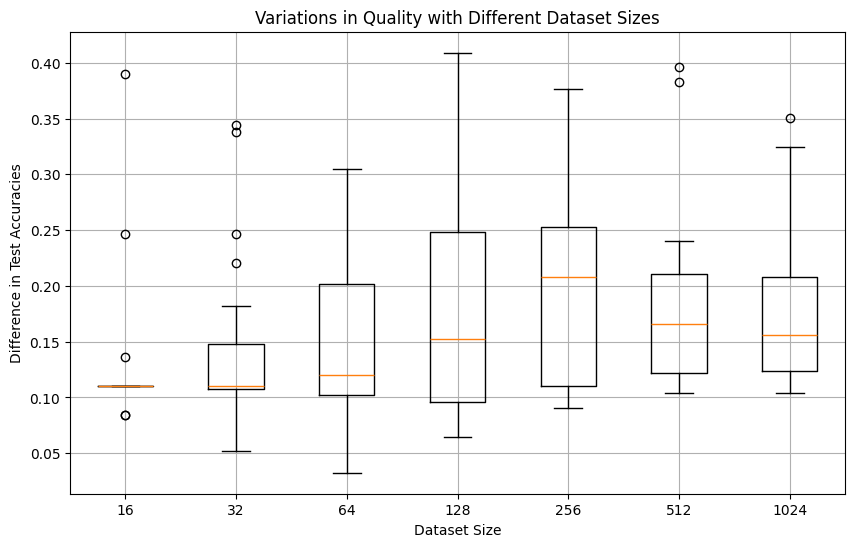

In [ ]:
# Plot the variations of the quality with different dataset sizes using box plots
plt.figure(figsize=(10, 6))
plt.boxplot(test_accuracy_diffs, labels=dataset_sizes)
plt.title('Variations in Quality with Different Dataset Sizes')
plt.xlabel('Dataset Size')
plt.ylabel('Difference in Test Accuracies')
plt.grid(True)
plt.show()

### **Evaluation of the privacy**

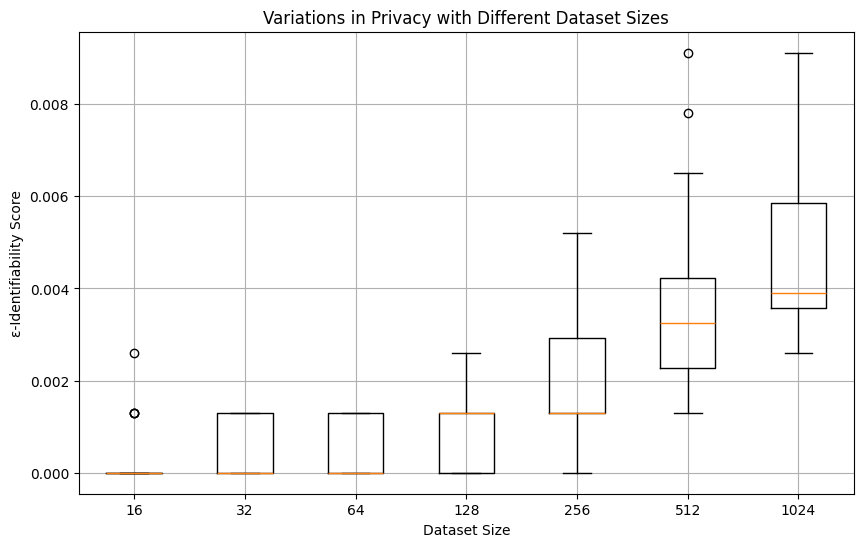

In [ ]:
# Plot the variations of identifiability with different dataset sizes using box plots
identifiability_scores_list = [scores for _, scores in identifiability_scores.items()]
plt.figure(figsize=(10, 6))
plt.boxplot(identifiability_scores_list, labels=dataset_sizes)
plt.title('Variations in Privacy with Different Dataset Sizes')
plt.xlabel('Dataset Size')
plt.ylabel('ε-Identifiability Score')
plt.grid(True)
plt.show()

### **Quality Vs Privacy**

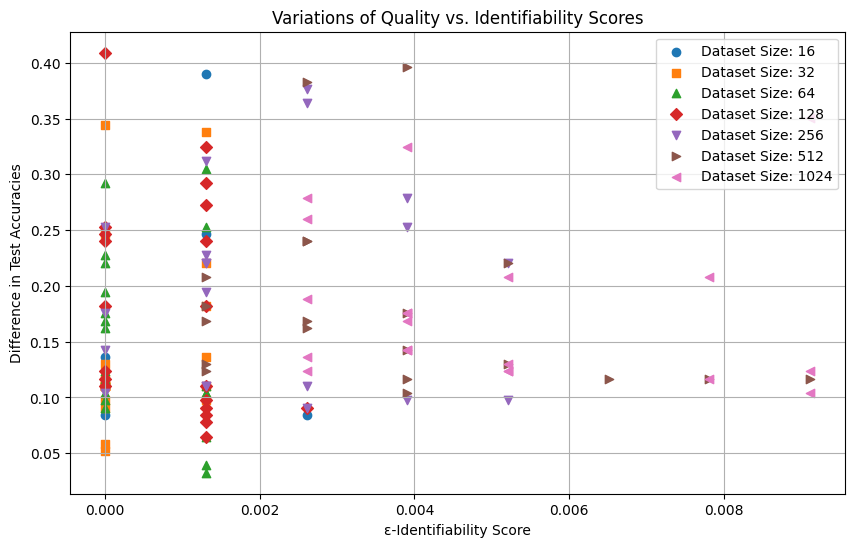

In [ ]:
import matplotlib.pyplot as plt

# Assuming identifiability_scores and test_accuracy_diffs are already computed

# Define marker styles for each dataset size
marker_styles = ['o', 's', '^', 'D', 'v', '>', '<', 'p']

# Plot the variations of quality vs. identifiability scores
plt.figure(figsize=(10, 6))
for i, size in enumerate(dataset_sizes):
    plt.scatter(identifiability_scores[size], test_accuracy_diffs[i], label=f'Dataset Size: {size}', marker=marker_styles[i])
plt.title('Variations of Quality vs. Identifiability Scores')
plt.xlabel('ε-Identifiability Score')
plt.ylabel('Difference in Test Accuracies')
plt.legend()
plt.grid(True)
plt.show()


### **Distribution of the generated data**

Text(0.5, 1.0, 'synthetic Data')

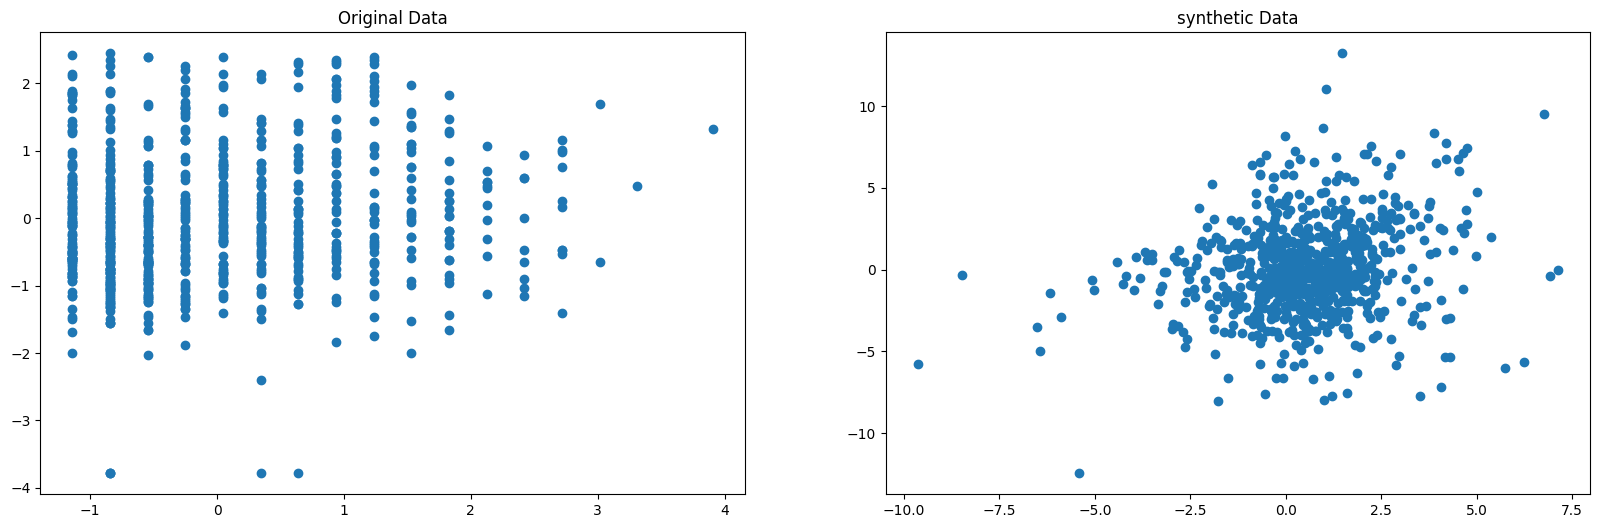

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(data.iloc[:, 0], data.iloc[:, 1])
ax[1].scatter(new_data[:, 0], new_data[:, 1])
ax[0].set_title("Original Data")
ax[1].set_title("synthetic Data")

## References

1. https://github.com/fatimazahraelaaziz/DP-GAN-for-Privacy-Preserving-Data-Generation
2. https://arxiv.org/abs/1901.02477
3. https://github.com/SAP-archive/security-research-differentially-private-generative-models/
4. https://www.kaggle.com/datasets/saurabh00007/diabetescsv